<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.

!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

# Time related functions.
import time

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# Command to connect to google drive and read dataset .The .csv file data is read using pandas library into a dataframe named data.
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Bank Churn Prediction/Churn.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
ds = data.copy()

## Data Overview

In [6]:
# head() function returns the first 5 rows
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Lets read the last 5 rows
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
#Get total number of records(rows and columns) in the dataframe by checking the shape
ds.shape

(10000, 14)

Observations:

The data has been successfully loaded into the dataframe.


The dataframe contains 14 columns.


There are 10,000 rows and 14 columns in the dataset.


The data includes customer unique IDs and geographic information.


Key customer attributes such as Age, Gender, Credit Score, and Estimated Salary are present.


The dataset includes details on customer account balance and the number of products purchased with the bank.


Customer activity status is also recorded in the data.


The Exited column indicates whether a customer has left the bank.


This dataset can help analyze whether a customer is likely to leave the bank within the next six months.





Check the data types of the columns for the dataset

In [9]:
#Get the dataset info for datatypes
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
#print columns based on data types
data_type_grouped = ds.columns.to_series().groupby(data.dtypes).groups
print(data_type_grouped)

{int64: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'], float64: ['Balance', 'EstimatedSalary'], object: ['Surname', 'Geography', 'Gender']}


In [11]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Observations

The dataset consists of approximately 14 columns.
Out of these, 9 columns are of integer type.
2 columns are of float type.
3 columns are of object type.


Each column contains 10,000 records.
No null values are observed in any column.

In [12]:
ds.duplicated().sum()

0

**Summary of the dataset**

In [13]:
#Statistical summary of numerical columns
ds.describe(exclude=["object"]).T


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Observations:

RowNumber and CustomerID serve as unique identifiers for each row and customer.


Customers have a minimum credit score of 350 and a maximum of 850.


Around 75% of customers have a credit score of approximately 718.


The mean credit score is ~650, and the median is ~652, showing minimal variance.


Customers' ages range from 18 to 92 years.


Around 75% of customers are 44 years old or younger.


The mean age is 38, and the median is ~37, indicating little variance.


The maximum tenure with the bank is 10 years, while the minimum is 0 years, likely representing new customers.


Around 75% of customers have been with the bank for approximately 7 years.


The mean tenure is ~5 years, and the median is also 5 years, showing minimal variance.


The maximum account balance is 250,898.09, while the minimum is 0.


Around 75% of customers have an account balance of approximately 127,000.


The mean balance is ~764,000, and the median is ~971,000, indicating some variance.


Most customers have at least one product, with a maximum of four.
Around 75% of customers have about 2 products.


The mean number of products is ~2, and the median is ~1.


Customers either have or do not have credit cards, with around 75% owning one.


Customers can be active or inactive, with about 75% being active.
Salaries range from 11.58 to ~199,992.


Around 75% of customers have a salary of approximately 149,388.
The mean salary is ~100,090, and the median is ~149,388.


Most customers remain with the bank, with about 75% having an exited flag of 0.


A smaller percentage of customers have exited, with the exited flag = 1.

In [14]:
#Statistical summary of categorical columns
ds.describe(include=["object"]).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


Observations

There are 3 unique georgraphical location . Most of the customers about 5014 are from France.


There are 2 types of gender. Most of the customer about 5457 are males.

**Number of unique values in categorical column**

In [15]:
#find the unique values in Object type columns
for i in ds.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Surname
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Wells         1
Calzada       1
Gresswell     1
Aguirre       1
Morales       1
Name: count, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
Male      5457
Female    4543
Name: count, dtype: int64
**************************************************


The dataset includes customers from three geographical locations: France, Germany, and Spain.


There are two gender categories, with approximately 5,457 males and 4,543 females.


Some customers have common surnames such as Smith, Scott, Martin, Walker, and Brown.


The presence of common surnames may indicate family members banking together or simply reflect popular surnames among customers.

Columns- RowNumber , CustomerId and Surname Treatment
**bold text**

In [16]:
# RowNumber consists of uniques ID for every row and CustomerId & surname is unqiue for every customer. It will not add value to the modeling and therefore could be dropped.
ds.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)


In [17]:
ds.info() #We see 11 columns after dropping 3 of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


## Exploratory Data Analysis

### Univariate Analysis

**functions to explore univariate and bivariate analysis on columns**

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Observations on CreditScore

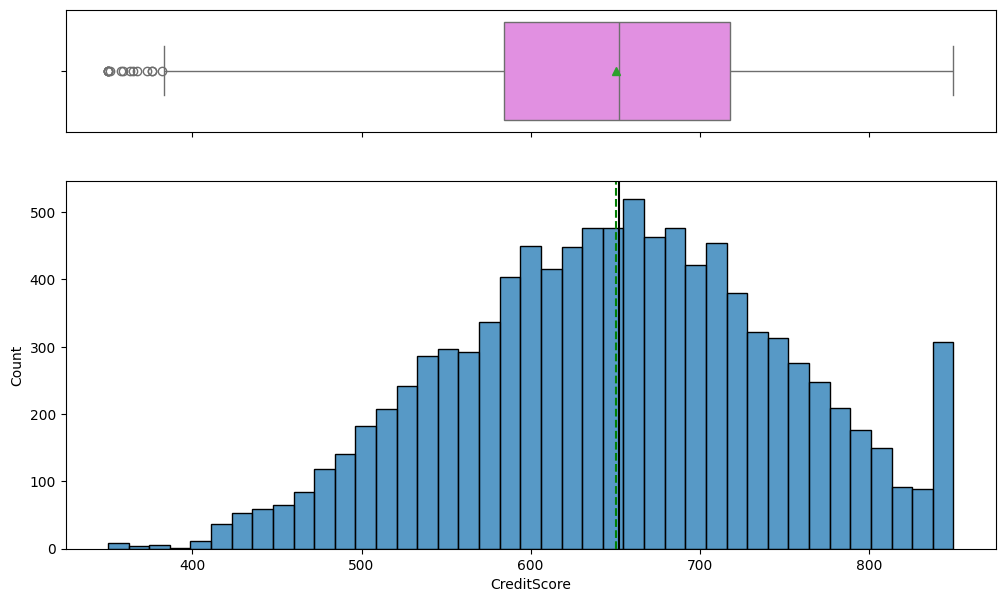

In [20]:
histogram_boxplot(ds,'CreditScore')

Observation

Min to max credit score ranges from 350 to about 850.

About ~520 customers have a credit score between 650 ~ 680

There are outliers on the lower end but the data is normally distributed.

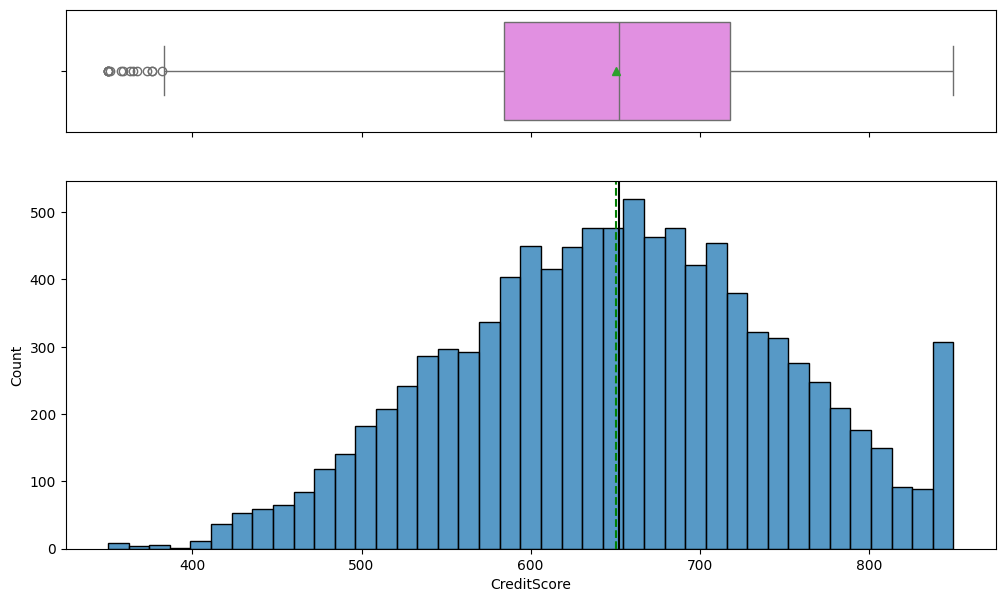

In [21]:
histogram_boxplot(ds,'CreditScore')

Observation

Min to max credit score ranges from 350 to about 850.

About ~520 customers have a credit score between 650 ~ 680

There are outliers on the lower end but the data is normally distributed.

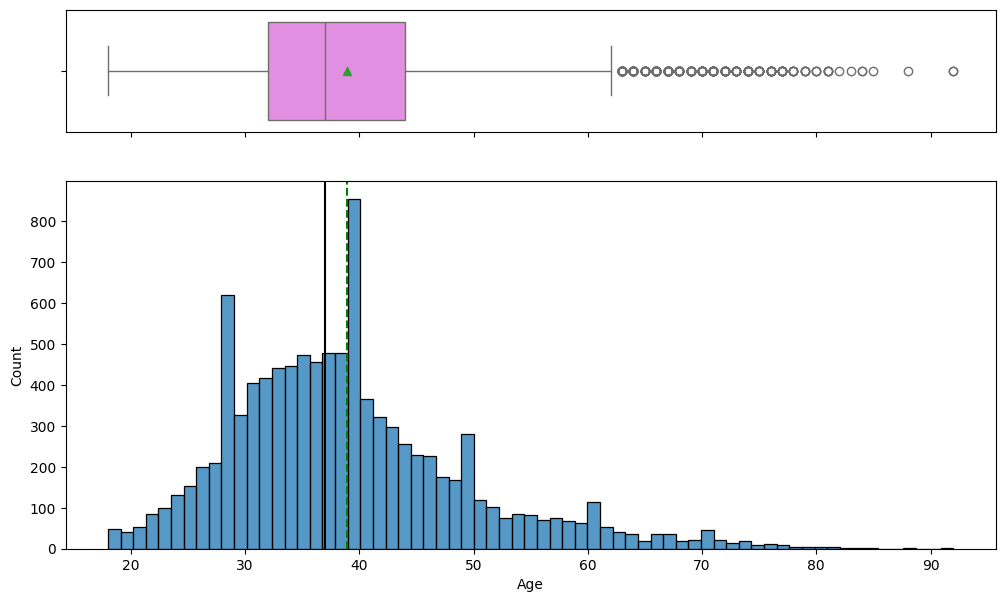

In [22]:
histogram_boxplot(ds,'Age')

The age of customers ranges from 18 to 92, including both young and elderly individuals.


Approximately 800 customers fall within the age range of 40 to 42.
There are outliers above the third quartile range.


The data distribution is right-skewed.

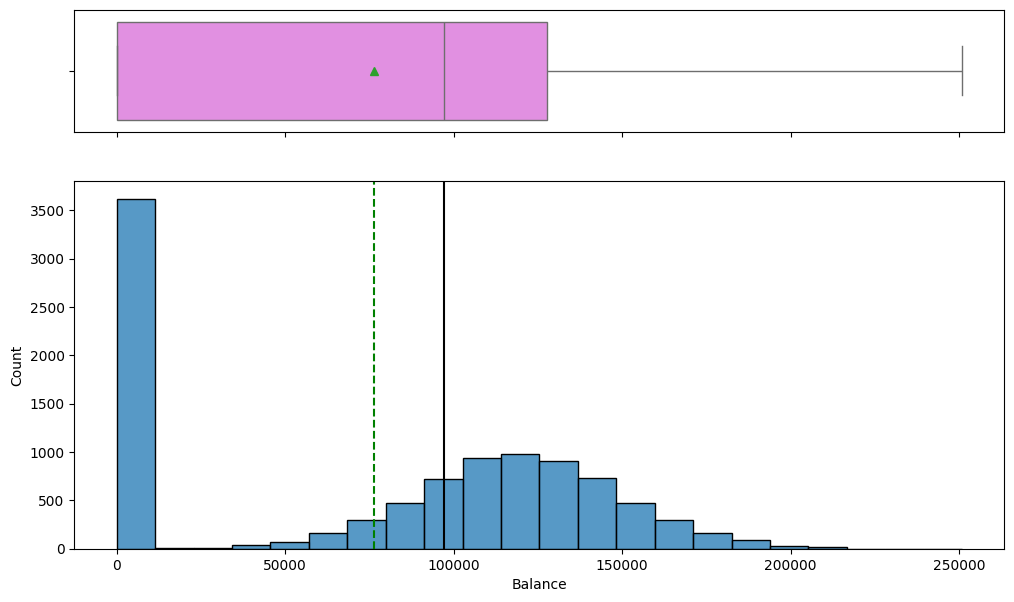

In [23]:
histogram_boxplot(ds,'Balance')

Observation

Min to max balance ranges from 0 to 2,50,000.

About ~3500 customers have a zero balance .

Most of the customers seems to have a balance on the lower end.

There are no outliers but the data is highly left skewed.

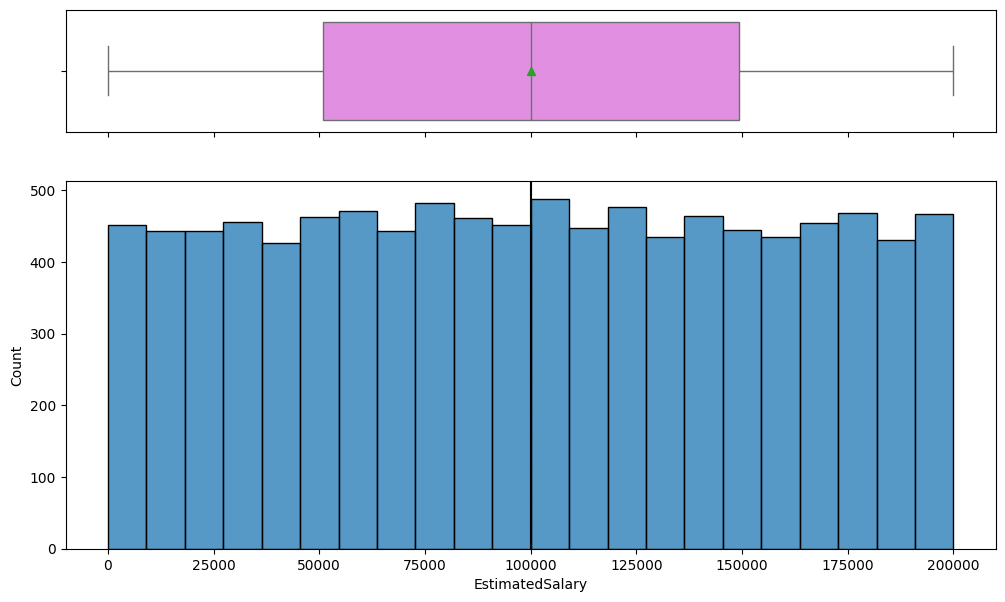

In [24]:
histogram_boxplot(ds,'EstimatedSalary')

Observation

Min to max salary ranges between ~0 and ~2,00,000


Data is normally distributed and there are customers having all range of salary.

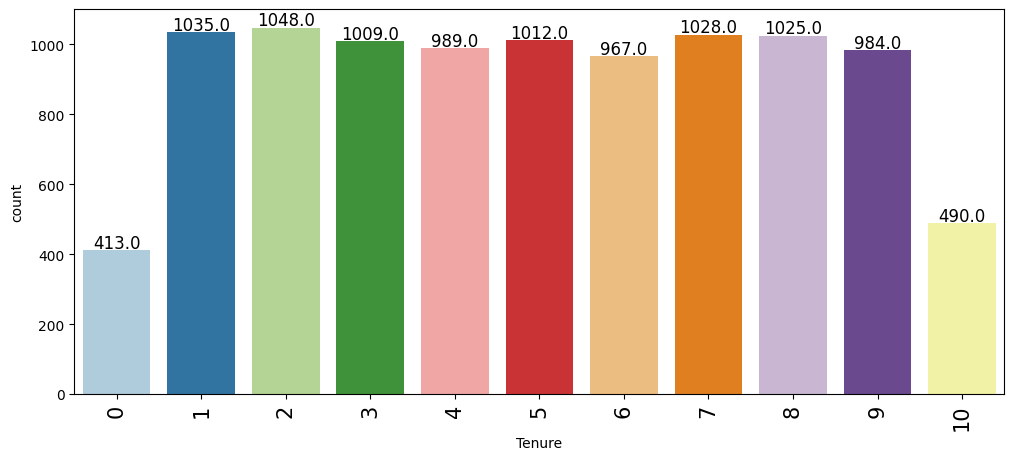

In [25]:
labeled_barplot(ds,'Tenure')

Observation

Min to max tenure in years ranges between 0 and 10.
There are about 490 customers who have been with the bank for about 10 years.

There are about 1048 customers who have been with the bank for about 2 years followed by max customers who have been with the bank for about 1, 7 and 8 years .

Data is normally distributed.

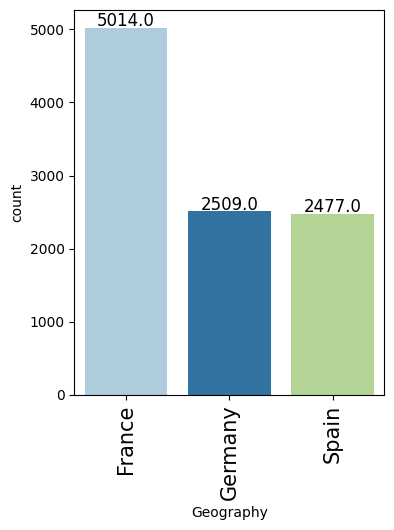

In [26]:
labeled_barplot(ds,'Geography')

Observation

About 5014 customers are from France followed by 2509 customers from Germany and 2477 customers from Spain.

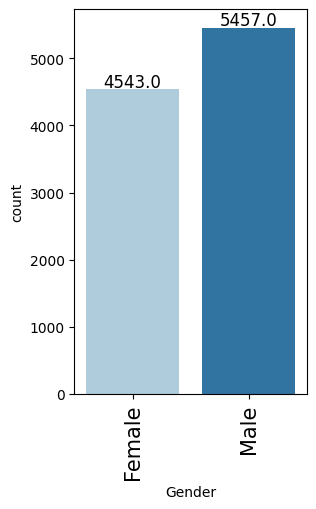

In [27]:
labeled_barplot(ds,'Gender')

Observation

About 5457 customers are males and 4543 customers are females.

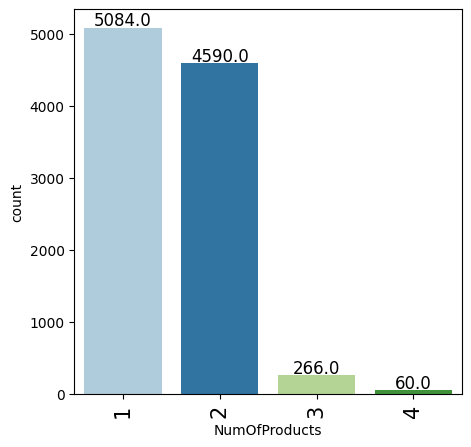

In [28]:

labeled_barplot(ds,'NumOfProducts')

Observation

About 5084 customers owns product 1 followed by 4549 customers product 2 and 266 customers owning product 3.


Least number of customers about 60 have owned product 4 .

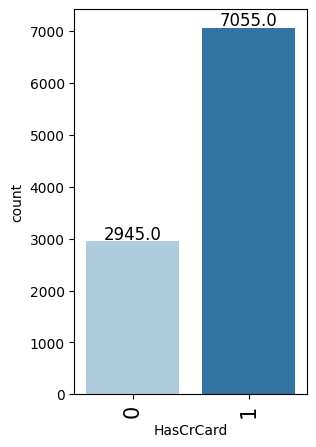

In [29]:
labeled_barplot(ds,'HasCrCard')

Observation

Most of the customers have credit card. About 7055 customers holds credit cards and 2945 does not have a credit card.

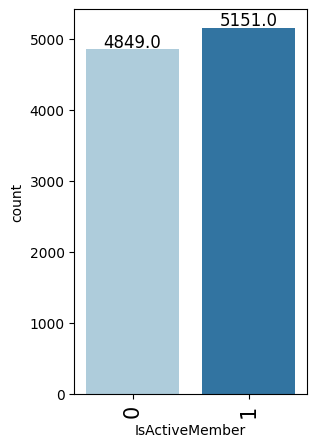

In [30]:
labeled_barplot(ds,'IsActiveMember')

Observation

Most of the customers are active. About 5151 customers are active and 4849 are inactive

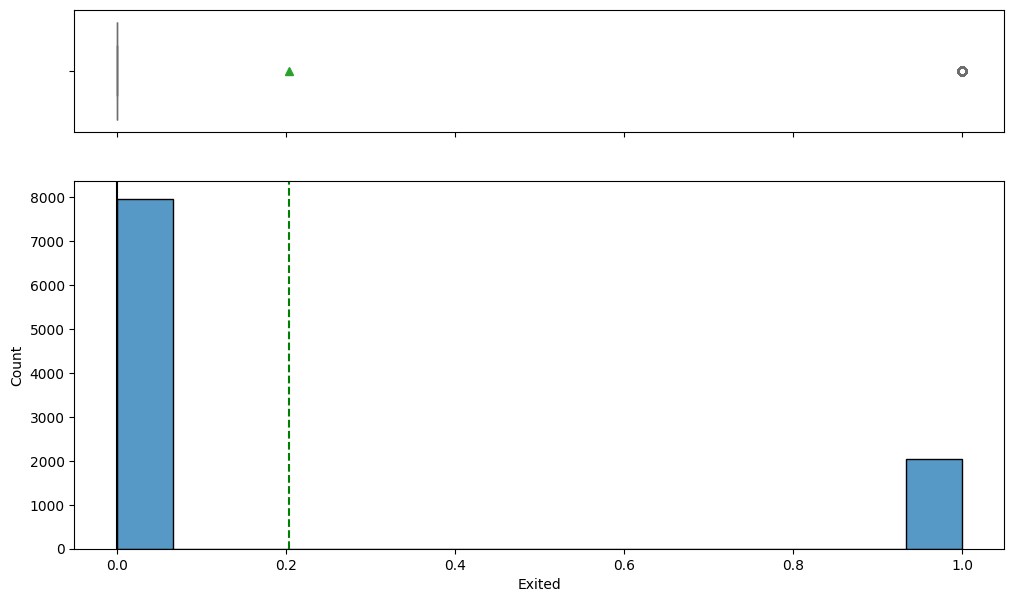

In [31]:
histogram_boxplot(ds,'Exited')

Observation

Exited =0 indicates that the customers are still with the bank .

 Most of the customers ~8000 are still with the bank indicated by the count . There are few customers ~ 2000 who have left bank services.

### Bivariate Analysis

In [32]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [33]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

**Correlation plot**

In [34]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","NumOfProducts","Tenure","Balance","EstimatedSalary","HasCrCard","IsActiveMember","Exited"]

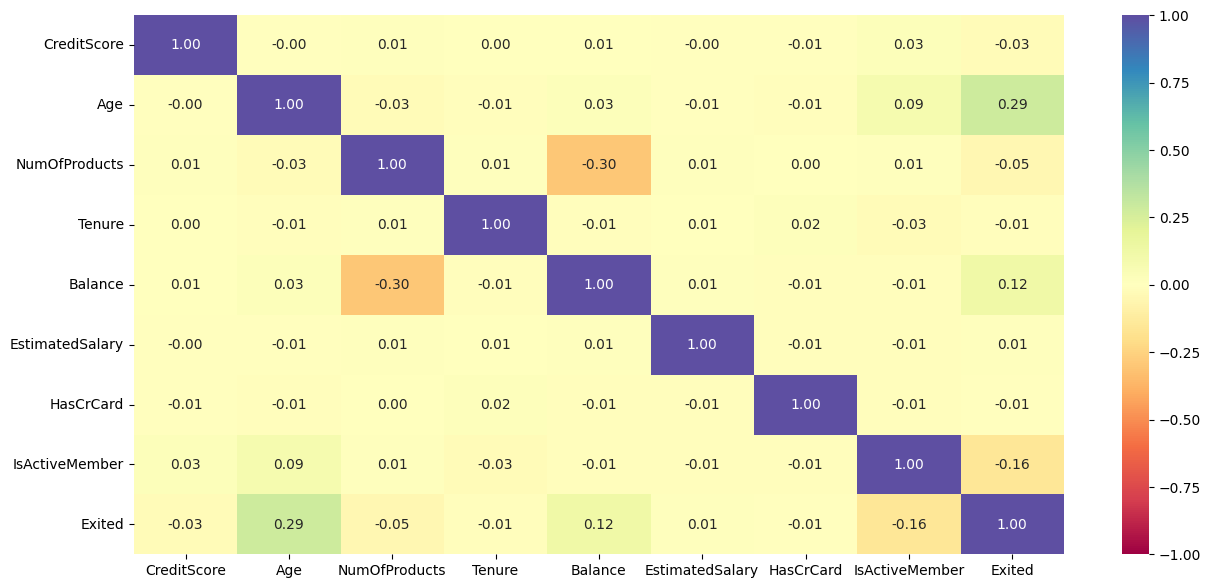

In [35]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is a negative correlation between Credit Score and the Exited column, indicating that customers with lower credit scores are more likely to leave the bank.


A negative correlation exists between Credit Score and Estimated Salary, suggesting that customers with lower incomes tend to have lower credit scores.


There is a positive correlation between Age and the Exited column, meaning younger customers are more likely to stay with the bank.


A negative correlation is observed between the Number of Products and Balance, indicating that customers with more products tend to have lower account balances.

**Exited Vs Geography**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


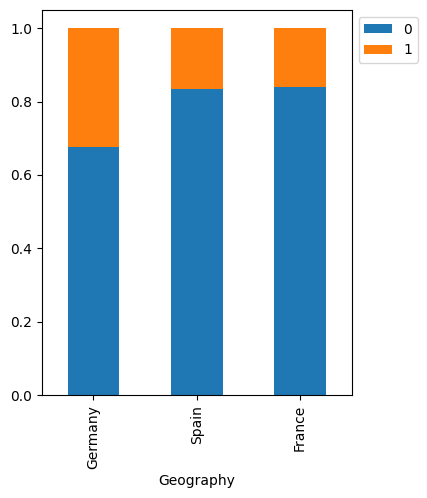

In [36]:
stacked_barplot(ds, "Geography", "Exited" )

Observation

The highest number of customers who left the bank are from Germany (814), followed by France (810) and Spain (413).


The majority of customers who stayed with the bank are from Spain (2,064).

**Exited Vs Gender**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


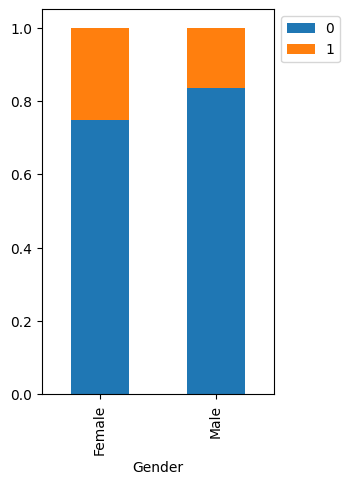

In [37]:
stacked_barplot(ds, "Gender", "Exited" )

Observation

Most of the customers who have left the bank services are females about 1139.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


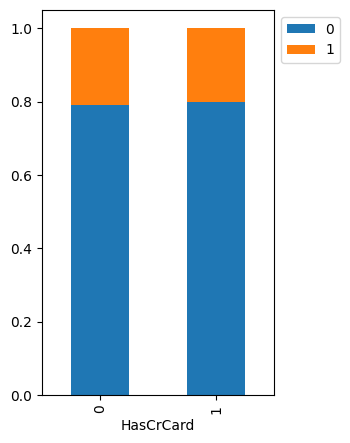

In [38]:
#Exited Vs Has Credit Card
stacked_barplot(ds, "HasCrCard", "Exited" )

Observation

Most of the customers having credit card about 5631 have stayed with the bank. About 1424 customers having credit card have left the bank.
About 233

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


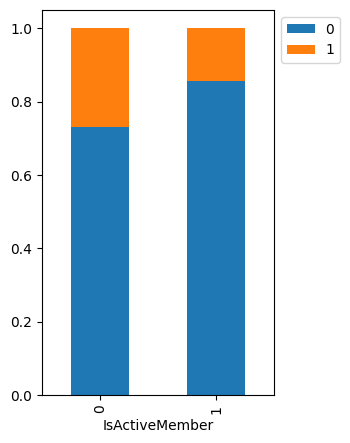

In [39]:
#Exited Vs Is active member
stacked_barplot(ds, "IsActiveMember", "Exited" )

Approximately 3,547 customers are inactive, with 1,302 of them having left the bank.


The majority of customers, around 4,416, are active, and 735 of them have exited the bank services.

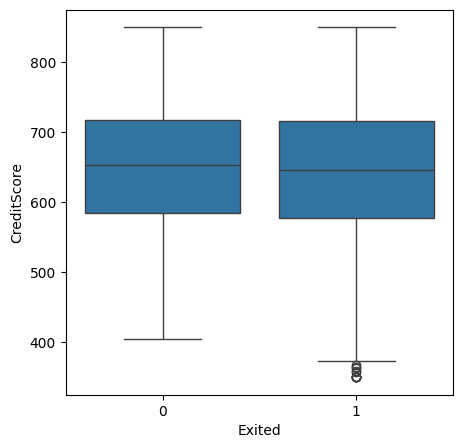

In [40]:
#Exited Vs Credit Score
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

Observation

Customers who have left the bank services seems to be having low credit card score when compared to customers who have stayed with the bank


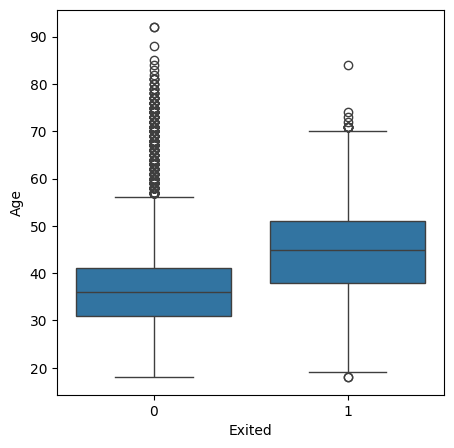

In [41]:
#Exited Vs Age
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

Customers who have remained with the bank primarily fall within the 30 to 40 age group, compared to those who have left.


Customers in the 38 to 50 age group are more likely to have exited the bank.


Outliers indicate that a few very aged customers have also stayed with the bank.

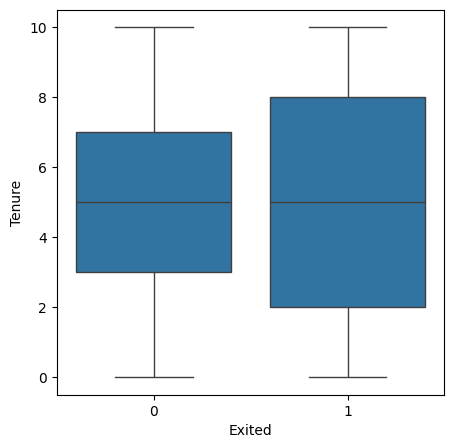

In [42]:
#Exited Vs Tenure
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)
plt.show()

Observation

Customers having 8 years of tenure with bank have also left the services and customer having 2 years of tenure have also left servuces
At this point, tenure with the bank does not seem to be influencing the Exited flag.

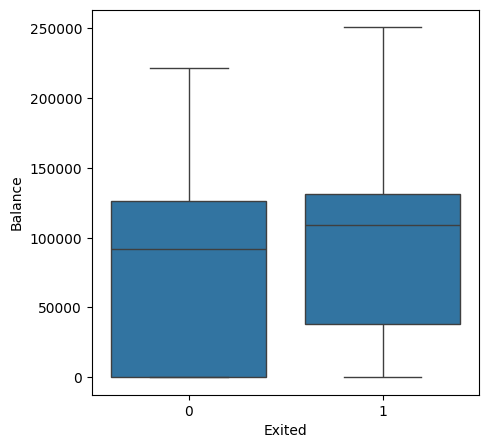

In [43]:
#Exited Vs Balance
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)
plt.show()

Observation

Customers who have stayed with bank and who have exited seem to have similar set of products.
At this point, number of products does not seem to be influencing the Exited flag.


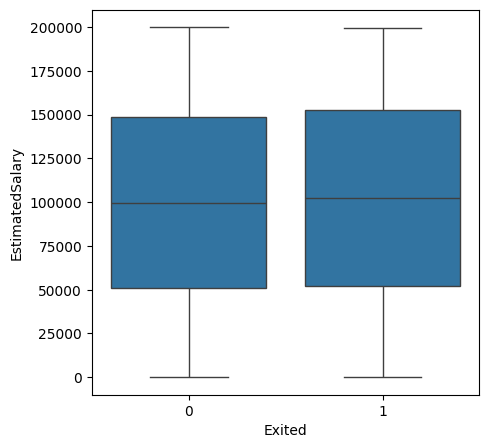

In [44]:
#Exited Vs Estimated Salary
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

The estimated salaries of both customers who stayed with the bank and those who left range between 50,000 and 150,000.


At this stage, estimated salary does not appear to have a direct impact on customer attrition (Exited flag).








## Data Preprocessing

**Outlier Detection**

In [45]:
#Getting numeric columns only to check for data outliers.
#Observed during EDA that there were lot of outliers in numeric columns

data_numeric_only = ds.select_dtypes(exclude=["object","category"])
Q1 = data_numeric_only.quantile(0.25)  # To find the 25th percentile
Q3 = data_numeric_only.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

# checking the % outliers
((ds.select_dtypes(include=["float64", "int64"]) < lower) | (ds.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

,0
CreditScore,0.15
Age,3.59
Tenure,0.00
Balance,0.00
NumOfProducts,0.60
HasCrCard,0.00
IsActiveMember,0.00
EstimatedSalary,0.00
Exited,20.37


Observation

We could exclude Exited flag from the outlier analysis since that is our target.


There are outliers about ~3 to 4% in columns like Age. Since its only a small percent of data , it is good not to treat them.


There are outliers about0.15 % in column Credit Score and 0.6% in column NumOfProducts.Since its only a small percent of data , it is good not to treat them.


There are no missing values in any columns . Therefore preprocessing does not require missing value treatment

**Train-validation-test Split**

In [46]:
X = ds.drop(['Exited'],axis=1) # Drop target variable from the independent variables
y = ds['Exited'] # Exited

### Dummy Variable Creation

In [47]:
# Select the object type columns for creating dummy variables
X = pd.get_dummies(X,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=int)


### Data Normalization

In [48]:
#Standardizing the numerical variables to zero mean and unit variance.
# Define the columns to scale
num_columns = ["CreditScore", "Balance", "EstimatedSalary", "Age", "Tenure", "NumOfProducts"]#Get all numerical columns

transformer = StandardScaler()
X[num_columns] = transformer.fit_transform(X[num_columns])


In [49]:
# Splitting the dataset into the Large and Testing set.
# first we split data into 2 parts, say large and test. Test will have 20% of data and X_large will have the rest 80%


X_large, X_test, y_large, y_test = train_test_split(X, y, test_size =0.2, random_state = 42,stratify=y,shuffle = True)

In [50]:
# Splitting the dataset into the Training and validation set.
# then we split the temporary set into train and validation.Train will have 75% and val will have the rest 25%

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size =0.25, random_state = 42,stratify=y_large, shuffle = True)

In [51]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6000
Number of rows in validation data = 2000
Number of rows in test data = 2000


In [52]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(6000, 11) (6000,)
(2000, 11) (2000,)
(2000, 11) (2000,)


In [53]:
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


The train, validation, and test datasets each contain 11 columns, which appears correct.


No rows have been dropped from the dataset.


Missing value treatment is not required, as there are no null values in the dataset.

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [55]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [56]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [57]:
#Defining the list of metrics to be used for all the models.
metrics = [tf.keras.metrics.Recall(name="recall")]

In [58]:
#Defining dataframe to display results
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

In [59]:

# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2560184216035168, 1: 4.905968928863451}

In [60]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 80
batch_size = 100

First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results everytime we run the code.

In [61]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

**Initial Model Building**

### Neural Network with SGD Optimizer

In [62]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [63]:
#Initializing the neural network
model_1_orig = Sequential()
# Adding the input layer with 11 input features and first hidden layer with 128 neurons and relu as activation function
model_1_orig .add(Dense(128, activation='relu', input_dim = X_train.shape[1]))
# Hidden layer with 64 neurons and activation as relu
model_1_orig .add(Dense(64, activation='relu'))
# Hidden layer with 32 neurons and activation as relu
model_1_orig .add(Dense(32, activation='relu'))
# Hidden layer with 16 neurons and activation as relu
model_1_orig .add(Dense(16, activation='relu'))
# Hidden layer with 8 neurons and activation as relu
model_1_orig .add(Dense(8, activation='relu'))
# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_1_orig .add(Dense(1, activation = 'sigmoid'))

After defining the model architecture, the next step is to compile the model.


During compilation, we need to specify:
The loss function to optimize.


The optimization algorithm.


The evaluation metric to assess model performance.


Since this is a binary classification task, we will minimize binary_crossentropy as the loss function.


We can choose from the following optimizers:
SGD
RMSprop
Adam
Adadelta
Adagrad
Adamax
Nadam
Ftrl

In [64]:
#Let's use SGD as optimizer with a learning rate

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

In [65]:
# compiling the model
model_1_orig.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [66]:
model_1_orig.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Observation



From the above summary, we can see that this architecture will train a total of 12545 parameters i.e. weights and biases in the network.

In [67]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_1_orig = model_1_orig.fit(X_train, y_train, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs,class_weight=cw_dict)

end=time.time()

Epoch 1/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 1.3556 - recall: 0.2612 - val_loss: 0.6862 - val_recall: 0.2580
Epoch 2/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 1.3555 - recall: 0.2643 - val_loss: 0.6862 - val_recall: 0.2604
Epoch 3/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 1.3554 - recall: 0.2720 - val_loss: 0.6862 - val_recall: 0.2629
Epoch 4/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 1.3554 - recall: 0.2767 - val_loss: 0.6862 - val_recall: 0.2629
Epoch 5/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 1.3553 - recall: 0.2768 - val_loss: 0.6862 - val_recall: 0.2703
Epoch 6/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 1.3553 - recall: 0.2833 - val_loss: 0.6863 - val_recall: 0.2703
Epoch 7/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 1.3552 - recall: 0.2897 - val_loss: 0.6863 - val_recall: 0.2752
Epoch 8/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 1.3551 - recall: 0.2950 - val_loss: 0.6863 - val_recall: 0.2850
Epoch 9/80
60/60

In [68]:
print("Time taken in seconds ",end-start)

Time taken in seconds  346.943656206131


Observation

For all 80 epochs, loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated.

 Recalls for training(recall) & validation set(val_recall) is calculated as well.


**Lets plot a graph**

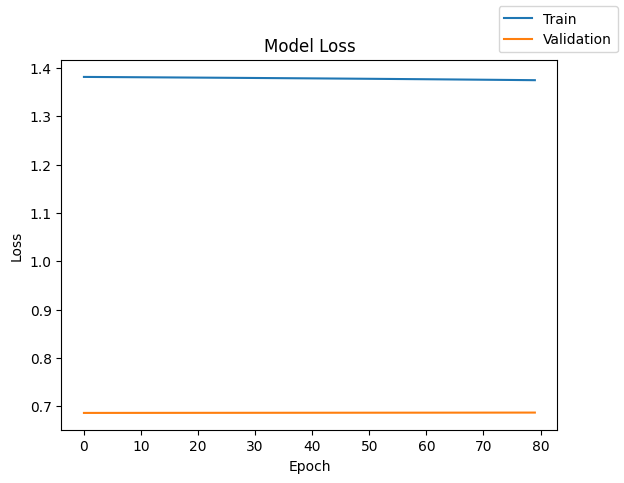

In [69]:
plot(history_1_orig,'loss')

Observation

The flat loss curve suggests that the loss function is not decreasing, meaning the model isn't learning effectively.

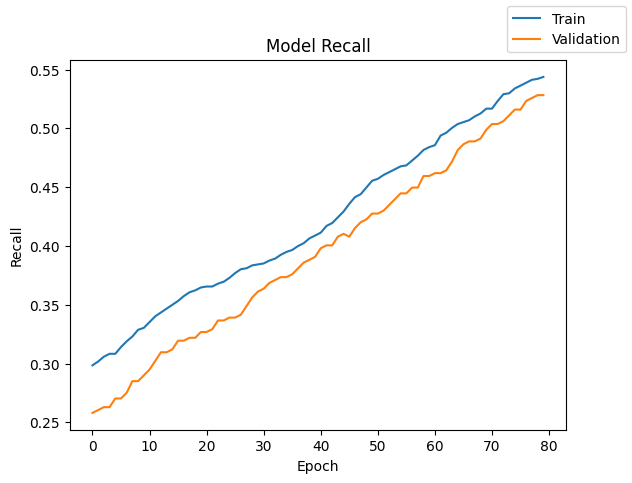

In [70]:
plot(history_1_orig,'recall')

Observation

TThe sharp rise in recall, followed by fluctuations and a gradual decline, suggests that the model initially captures patterns but struggles to sustain or enhance its performance over time.

In [71]:

#Predicting the results using best as a threshold
y_train_pred = model_1_orig.predict(X_train)
y_train_pred = (y_train_pred > 0.5) #Lets use 0.5 as a threshold for predicting True /False
y_train_pred

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [72]:
#Predicting the results using best as a threshold
y_val_pred = model_1_orig.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [73]:
#Adding the recall scores to the data frame
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [74]:
train_metric_df

,recall
NN with SGD,0.546198


In [75]:
valid_metric_df

,recall
NN with SGD,0.528256


Observation

Recall scores on training set is about 0.54 and is about ~0.528 in validation set. Recall scores on both sets seems to be pretty close and but the score needs to be improved.

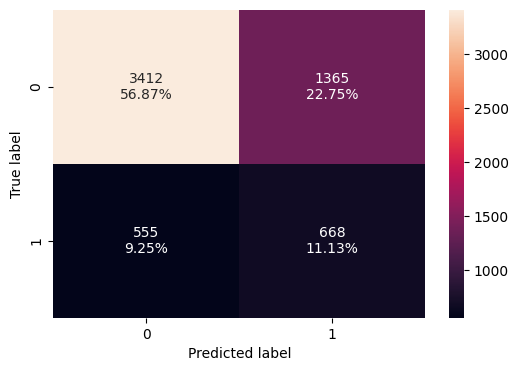

In [76]:
make_confusion_matrix(y_train, y_train_pred)

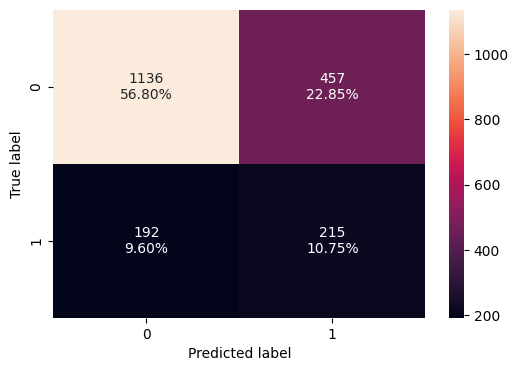

In [77]:
make_confusion_matrix(y_val, y_val_pred)

Observation

Confusion matrix displays that on the training set , the model has predicted 11.13% of True positives and 9.25 % of false negatives.


Confusion matrix displays that on the validation set , the model has predicted 10.75% of True positives and 9.6 % of false negatives.


Lets see if we can reduce the false negatives on the validation set.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [78]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [79]:
X_train.shape

(6000, 11)

Lets try with 64/32/16 set of neurons for this model instead of adding more parameters to the model

In [80]:
#Initializing the neural network
model_2_orig = Sequential()
# Adding the input layer with 11 input features and first hidden layer with 64 neurons and relu as activation function
model_2_orig .add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Hidden layer with 32 neurons and activation as relu
model_2_orig .add(Dense(32, activation='relu'))
# Hidden layer with 16 neurons and activation as relu
model_2_orig .add(Dense(16, activation='relu'))
# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_2_orig .add(Dense(1, activation = 'sigmoid'))

In [81]:
#Let's use Adam as optimizer with a learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [82]:
# compiling the model
model_2_orig.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)


In [83]:
model_2_orig.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Observation

From the above summary, we can see that this architecture will train a total of 3393 parameters i.e. weights and biases in the network.

In [85]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_2_orig = model_2_orig.fit(X_train, y_train, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs,class_weight=cw_dict)

end=time.time()

Epoch 1/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 1.4383 - recall: 0.7802 - val_loss: 0.8147 - val_recall: 0.9828
Epoch 2/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 1.3767 - recall: 0.9813 - val_loss: 0.7642 - val_recall: 0.9558
Epoch 3/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 1.3394 - recall: 0.9378 - val_loss: 0.7300 - val_recall: 0.9042
Epoch 4/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 1.3077 - recall: 0.8784 - val_loss: 0.7007 - val_recall: 0.8329
Epoch 5/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 1.2733 - recall: 0.8385 - val_loss: 0.6734 - val_recall: 0.7887
Epoch 6/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 1.2368 - recall: 0.8008 - val_loss: 0.6512 - val_recall: 0.7469
Epoch 7/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 1.2002 - recall: 0.7840 - val_loss: 0.6320 - val_recall: 0.7371
Epoch 8/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 1.1657 - recall: 0.7836 - val_loss: 0.6148 - val_recall: 0.7346
Epoch 9/80
60/6

In [86]:
print("Time taken in seconds ",end-start)

Time taken in seconds  522.940657377243


Observation

For all 80 epochs, loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated.

Recalls for training(recall) & validation set(val_recall) is calculated as well.

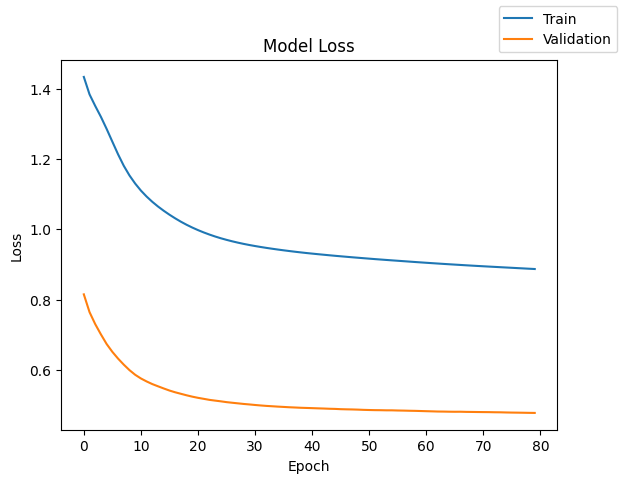

In [87]:
plot(history_2_orig,'loss')

Observation

Training set and validation set both shows a loss to be consistent and is descending.


Validation loss is much lesser than training loss which is good.

Model seems to be learning effectively.

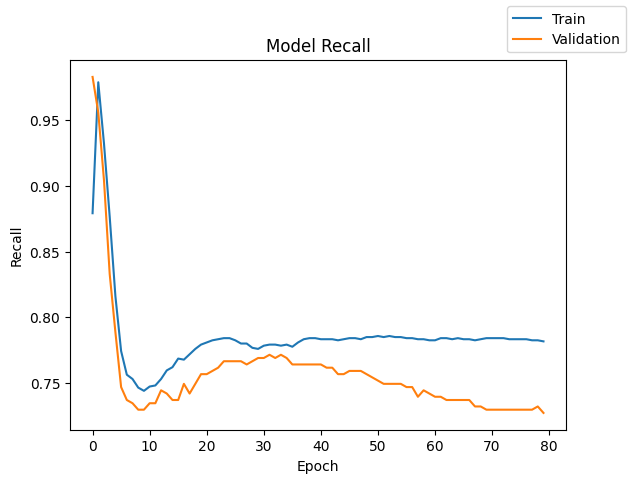

In [88]:
plot(history_2_orig,'recall')

Observation

Recall scores on both training and validation set decreases rapidly and starts oscillating after 10th epoch.

After the initial decrease, the recall score starts to oscillate with a slight upward trend, indicating that the model is learning to recover and improve its recall

In [89]:
#Predicting the results using best as a threshold
y_train_pred_2 = model_2_orig.predict(X_train)
y_train_pred_2 = (y_train_pred_2 > 0.5)
y_train_pred_2

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [90]:
#Predicting the results using best as a threshold
y_val_pred_2 = model_2_orig.predict(X_val)
y_val_pred_2 = (y_val_pred_2 > 0.5)
y_val_pred_2

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [91]:
#Adding the recall scores to the data frame
model_name = "NN with ADAM"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred_2)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_2)

In [92]:
train_metric_df

,recall
NN with SGD,0.546198
NN with ADAM,0.795585


In [93]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.727273


Observation

Recall scores on training set is about 0.79 and is about ~0.72 in validation set for model NN with Adam.

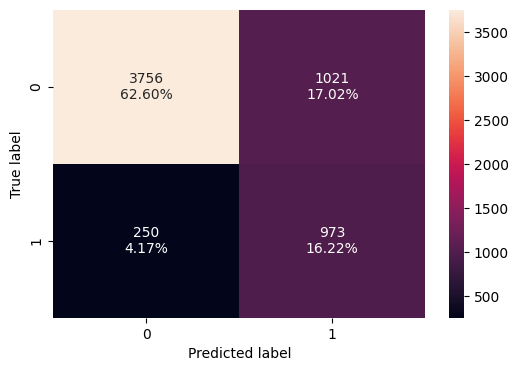

In [94]:
make_confusion_matrix(y_train, y_train_pred_2)

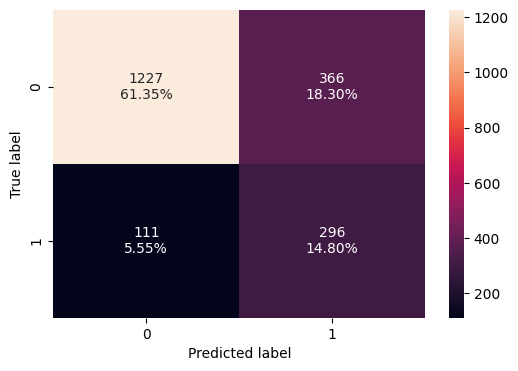

In [95]:
make_confusion_matrix(y_val, y_val_pred_2)

The confusion matrix for the training set shows that the model predicted 16% True Positives and 4.17% False Negatives.


The confusion matrix for the validation set indicates 14.80% True Positives and 5.55% False Negatives.

### Neural Network with Adam Optimizer and Dropout

In [96]:
#Lets see if we can reduce the false negatives on the validation set.
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [97]:
#Initializing the neural network
model_3_orig = Sequential()

model_3_orig .add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Hidden layer with 32 neurons and activation as relu
model_3_orig .add(Dense(32, activation='relu'))
#Add drop out of 0.2 i.e 20% of neurons will be dropped
model_3_orig.add(Dropout(0.2))
# Hidden layer with 16 neurons and activation as relu
model_3_orig .add(Dense(16, activation='relu'))
#Add drop out of 0.1 i.e 10% of neurons will be dropped
model_3_orig.add(Dropout(0.1))

# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_3_orig .add(Dense(1, activation = 'sigmoid'))

In [98]:
#Let's use Adam as optimizer with a learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [99]:
# compiling the model
model_3_orig.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [100]:
model_3_orig.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Observation

From the above summary, we can see that this architecture will train a total of 3393 parameters i.e. weights and biases in the network.

In [101]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_3_orig = model_3_orig.fit(X_train, y_train, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs,class_weight=cw_dict)

end=time.time()

Epoch 1/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 1.3767 - recall: 0.4390 - val_loss: 0.6546 - val_recall: 0.1523
Epoch 2/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 1.3475 - recall: 0.3221 - val_loss: 0.6560 - val_recall: 0.3563
Epoch 3/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - loss: 1.3270 - recall: 0.4731 - val_loss: 0.6522 - val_recall: 0.5283
Epoch 4/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 1.3048 - recall: 0.5690 - val_loss: 0.6436 - val_recall: 0.6192
Epoch 5/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 1.2759 - recall: 0.6224 - val_loss: 0.6314 - val_recall: 0.6609
Epoch 6/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 1.2514 - recall: 0.6782 - val_loss: 0.6192 - val_recall: 0.6929
Epoch 7/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 1.2301 - recall: 0.6801 - val_loss: 0.6066 - val_recall: 0.7101
Epoch 8/80
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - loss: 1.2108 - recall: 0.6903 - val_loss: 0.5923 - val_recall: 0.7101
Epoch 9/80


Observation

For all 80 epochs, loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation set(val_recall) is calculated as well.

In [102]:
print("Time taken in seconds ",end-start)

Time taken in seconds  608.8637223243713


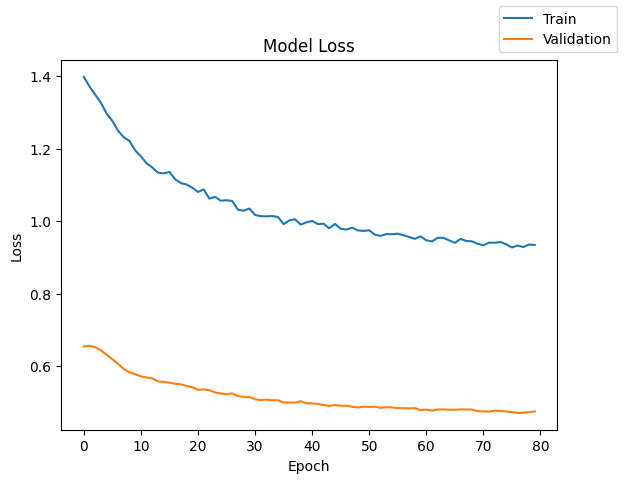

In [103]:
plot(history_3_orig,'loss')

Observation

Training set shows a decrease in loss though it is fluctuating. Model seems to be learning gradually.


Validation set shows a decrease in loss and loss almost flattens after about 70 epochs though with few oscillations.

Oscillations could be due to learning rate being higher but overall, model seems to be learning effectively.

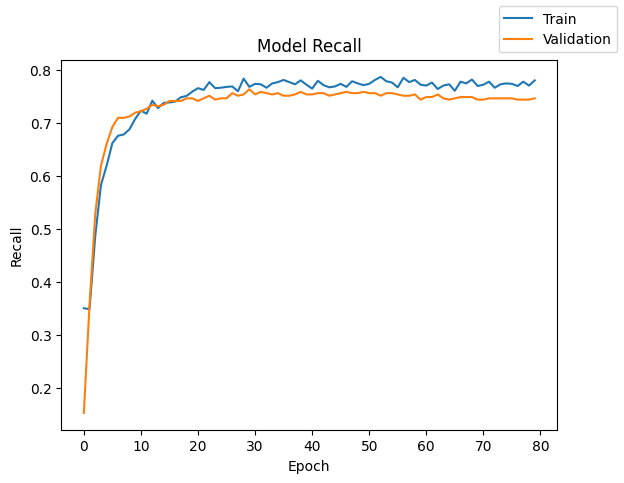

In [104]:
plot(history_3_orig,'recall')

Observation

Recall scores on both training and validation test did increase but seems to be fluctuating after 0.7 recall score at close to 10th epoch.

Model seems to identify positive instances more accurately. Fluctuations in recall score after a certain epoch may indicate signs of overfitting after a certain point.

In [105]:

#Predicting the results using best as a threshold
y_train_pred_3 = model_3_orig.predict(X_train)
y_train_pred_3 = (y_train_pred_3 > 0.5)
y_train_pred_3

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [106]:
#Predicting the results using best as a threshold
y_val_pred_3 = model_3_orig.predict(X_val)
y_val_pred_3 = (y_val_pred_3 > 0.5)
y_val_pred_3

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [107]:
#Lets add the recall scores to the data frame
model_name = "NN with ADAM Dropout"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred_3)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_3)

In [108]:
train_metric_df

,recall
NN with SGD,0.546198
NN with ADAM,0.795585
NN with ADAM Dropout,0.789861


In [109]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.727273
NN with ADAM Dropout,0.746929


Observation

Recall scores on training set is about 0.78 and is about ~0.74 in validation set for the current NN with Adam dropout model.

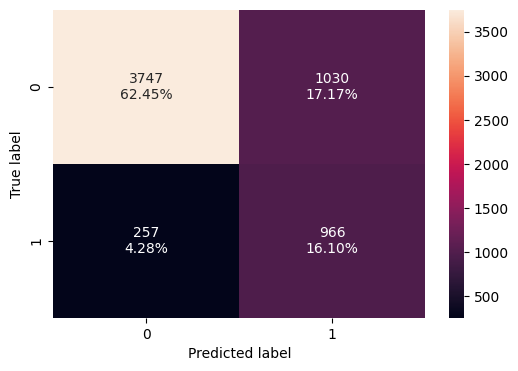

In [110]:
make_confusion_matrix(y_train, y_train_pred_3)

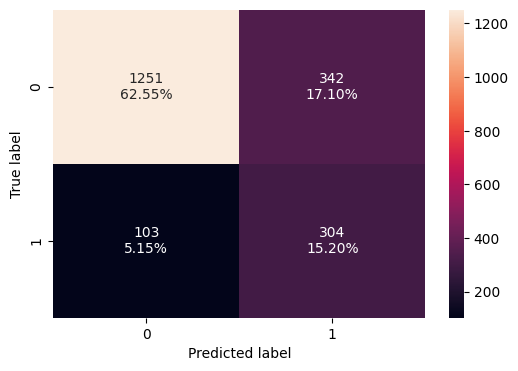

In [111]:

make_confusion_matrix(y_val, y_val_pred_3)

Observation

Confusion matrix displays that on the training set , the model has predicted 16.10% of True positives and 4.28 % of false negatives.


Confusion matrix displays that on the validation set , the model has predicted 15.20% of True positives and 5.15 % of false negatives.


Lets see if we can reduce the false negatives on the validation set.



### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Since we are dealing with imbalanced data sets, one of the technique to balance data set is to oversample the minority class. This type of data augmentation is called SMOTE. SMOT uses KNN algorithm in the background.Lets see how this is achieved.

In [114]:
print("Before Oversampling, counts of label 'NonExisting customers': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Existing customers': {} \n".format(sum(y_train == 0)))


Before Oversampling, counts of label 'NonExisting customers': 1223
Before Oversampling, counts of label 'Existing customers': 4777 



In [115]:
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=42
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'NonExisting customers': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Existing customers': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, counts of label 'NonExisting customers': 4777
After Oversampling, counts of label 'Existing customers': 4777 

After Oversampling, the shape of train_X: (9554, 11)
After Oversampling, the shape of train_y: (9554,) 



Observation

After Oversampling, counts of label 'NonExisting customers'is 4777


After Oversampling, counts of label 'Existing customers'is 4777

In [116]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [117]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [118]:
#Initializing the neural network
model_4_smote = Sequential()

model_4_smote .add(Dense(64, activation='relu', input_dim = X_train_over.shape[1])) #Use smote train data set
# Hidden layer with 32 neurons and activation as relu
model_4_smote .add(Dense(32, activation='relu'))
# Hidden layer with 16 neurons and activation as relu
model_4_smote .add(Dense(16, activation='relu'))
# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_4_smote .add(Dense(1, activation = 'sigmoid'))

In [119]:
#Let's use SGD as optimizer with a learning rate

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)

In [121]:
# compiling the model
model_4_smote.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)


In [122]:
model_4_smote.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Observation

From the above summary, we can see that this architecture will train a total of 3393 parameters i.e. weights and biases in the network.

In [123]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_4_smote = model_4_smote.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs)

end=time.time()

Epoch 1/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.6829 - recall: 0.5364 - val_loss: 0.6750 - val_recall: 0.4300
Epoch 2/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.6828 - recall: 0.4769 - val_loss: 0.6749 - val_recall: 0.4300
Epoch 3/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.6826 - recall: 0.4759 - val_loss: 0.6748 - val_recall: 0.4300
Epoch 4/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.6825 - recall: 0.4776 - val_loss: 0.6747 - val_recall: 0.4300
Epoch 5/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.6824 - recall: 0.4796 - val_loss: 0.6747 - val_recall: 0.4300
Epoch 6/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.6823 - recall: 0.4803 - val_loss: 0.6746 - val_recall: 0.4300
Epoch 7/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.6821 - recall: 0.4817 - val_loss: 0.6745 - val_recall: 0.4324
Epoch 8/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.6820 - recall: 0.4831 - val_loss: 0.6744 - val_recall: 0.4349
Epoch 9/80
96/96

In [124]:
print("Time taken in seconds ",end-start)

Time taken in seconds  416.83940529823303


Observation

For all 80 epochs, loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated.

 Recalls for training(recall) & validation set(val_recall) is calculated as well.

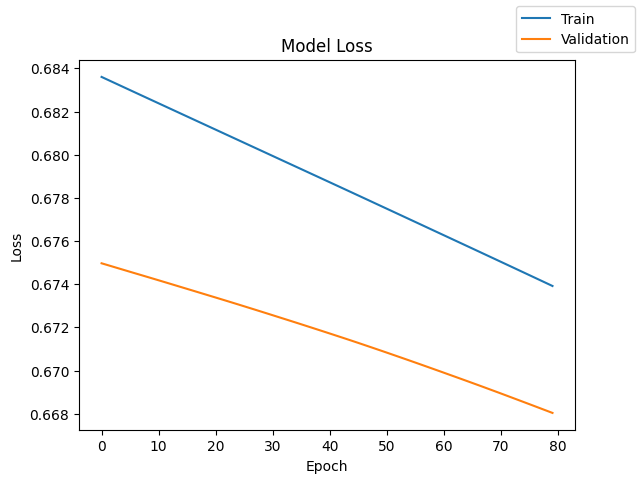

In [125]:
plot(history_4_smote,'loss')

Observation

Training and validation set shows a steady decrease in loss function.
A straight line suggests that the loss reduction per epoch is constant and it appears that there is a consistent improvement in the model's performance.

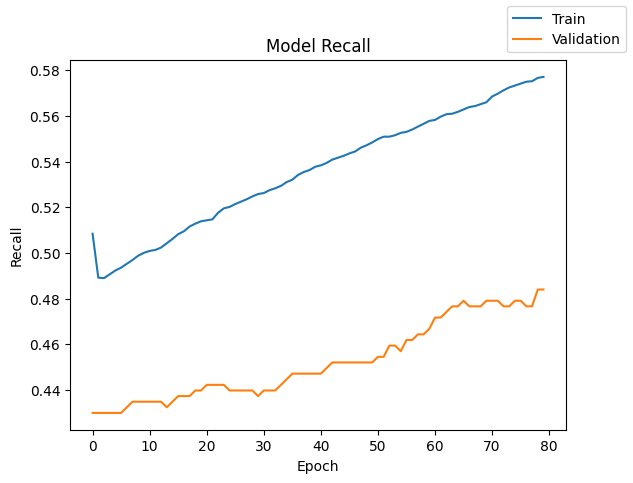

In [126]:
plot(history_4_smote,'recall')

Observation

Both recall scores on training and validation data is increasing steadily with oscillations.

This pattern is typical in scenarios where the model is gradually learning to identify more true positives, but variability in the training data or learning process causes fluctuations.

In [127]:
#Predicting the results using best as a threshold
y_train_pred_4 = model_4_smote.predict(X_train_over)
y_train_pred_4 = (y_train_pred_4 > 0.5)
y_train_pred_4

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

In [128]:
#Predicting the results using best as a threshold
y_val_pred_4 = model_4_smote.predict(X_val)
y_val_pred_4 = (y_val_pred_4 > 0.5)
y_val_pred_4

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

In [129]:
#Lets add the recall scores to the data frame
model_name = "NN with Smote SGD"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred_4)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_4)

In [130]:
train_metric_df

,recall
NN with SGD,0.546198
NN with ADAM,0.795585
NN with ADAM Dropout,0.789861
NN with Smote SGD,0.577768


In [131]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.727273
NN with ADAM Dropout,0.746929
NN with Smote SGD,0.484029


Observation

Recall scores on training set is about 0.57 and is about ~0.48 in validation set for model NN with Smote SGD.

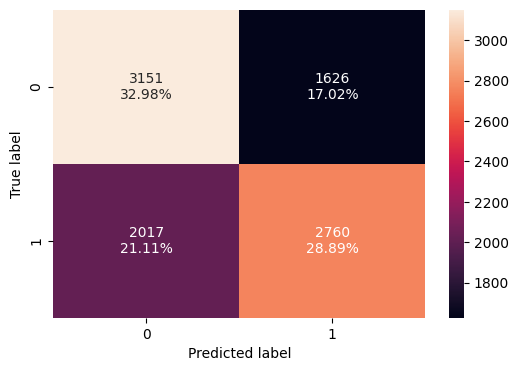

In [132]:
make_confusion_matrix(y_train_over, y_train_pred_4)

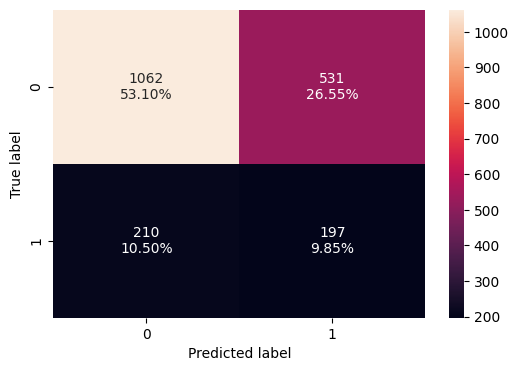

In [133]:
make_confusion_matrix(y_val, y_val_pred_4)

Observation

Confusion matrix displays that on the training set , the model has predicted 28.89% of True positives and 21.11% of false negatives.


Confusion matrix displays that on the validation set , the model has predicted 9.85% of True positives and 10.50 % of false negatives.


**It is observed that False negatives on validation set is not in line with training set.**

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [134]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [135]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [136]:
#Initializing the neural network
model_5_smote = Sequential()

model_5_smote .add(Dense(64, activation='relu', input_dim = X_train_over.shape[1]))
# Hidden layer with 32 neurons and activation as relu
model_5_smote .add(Dense(32, activation='relu'))
# Hidden layer with 16 neurons and activation as relu
model_5_smote .add(Dense(16, activation='relu'))
# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_5_smote .add(Dense(1, activation = 'sigmoid'))

In [138]:
#Using Adam as optimizer with a learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [139]:
# compiling the model
model_5_smote.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [140]:
model_5_smote.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Observation

From the above summary, we see that this architecture will train a total of 3393 parameters i.e. weights and biases in the network.

In [141]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_5_smote = model_5_smote.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs)

end=time.time()

Epoch 1/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.6764 - recall: 0.5037 - val_loss: 0.6493 - val_recall: 0.5184
Epoch 2/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.6484 - recall: 0.6286 - val_loss: 0.6151 - val_recall: 0.5872
Epoch 3/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.6131 - recall: 0.6704 - val_loss: 0.5815 - val_recall: 0.6118
Epoch 4/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 0.5762 - recall: 0.7053 - val_loss: 0.5590 - val_recall: 0.6314
Epoch 5/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 0.5463 - recall: 0.7353 - val_loss: 0.5448 - val_recall: 0.6511
Epoch 6/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.5248 - recall: 0.7518 - val_loss: 0.5351 - val_recall: 0.6560
Epoch 7/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 0.5089 - recall: 0.7647 - val_loss: 0.5275 - val_recall: 0.6560
Epoch 8/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.4961 - recall: 0.7725 - val_loss: 0.5201 - val_recall: 0.6683
Epoch 9/80
9

Observation

For all 80 epochs, loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation set(val_recall) is calculated as well.

In [142]:
print("Time taken in seconds ",end-start)

Time taken in seconds  710.9439117908478


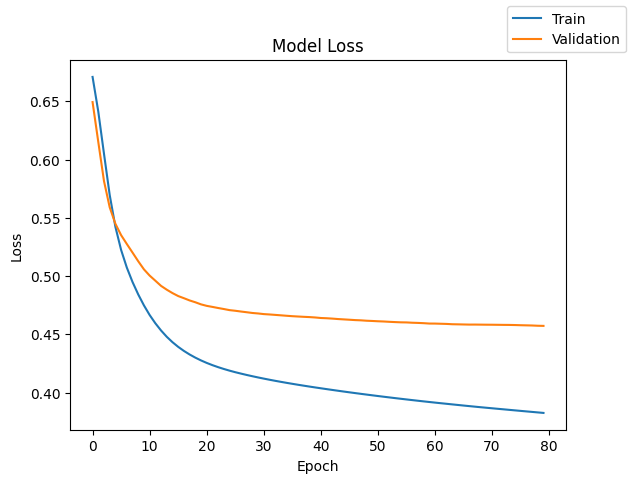

In [143]:
plot(history_5_smote,'loss')

The training and validation sets show a steady decrease in the loss function, indicating that the model is learning and minimizing errors.


The validation loss fluctuates, which may suggest overfitting or a high learning rate.

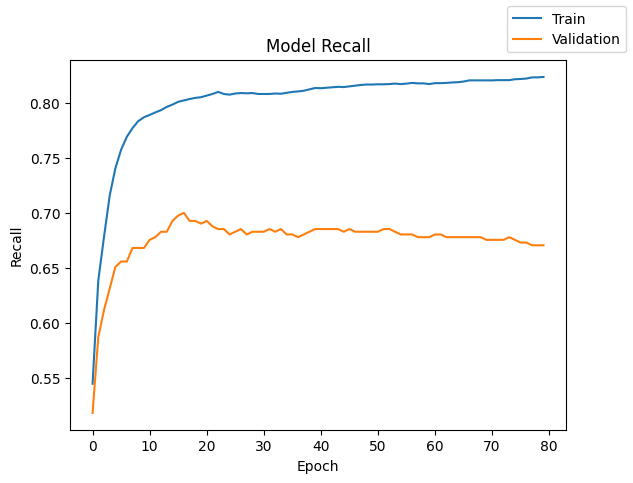

In [144]:
plot(history_5_smote,'recall')

Recall scores for both the training and validation sets show an upward trend.


The oscillations in recall scores suggest that the model may be overfitting or that a high learning rate was used.


This pattern is common when the model is improving at identifying true positives, but variability in the training data or learning process leads to fluctuations.

In [145]:
#Predicting the results using best as a threshold
y_train_pred_5 = model_5_smote.predict(X_train_over)
y_train_pred_5 = (y_train_pred_5 > 0.5)
y_train_pred_5

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [146]:
#Predicting the results using best as a threshold
y_val_pred_5 = model_5_smote.predict(X_val)
y_val_pred_5 = (y_val_pred_5 > 0.5)
y_val_pred_5

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [147]:
#Adding the recall scores to the data frame
model_name = "NN with Smote Adam"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred_5)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_5)

In [148]:
train_metric_df

,recall
NN with SGD,0.546198
NN with ADAM,0.795585
NN with ADAM Dropout,0.789861
NN with Smote SGD,0.577768
NN with Smote Adam,0.828135


In [149]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.727273
NN with ADAM Dropout,0.746929
NN with Smote SGD,0.484029
NN with Smote Adam,0.670762


Observation

Recall scores on training set is about 0.82 and is about ~0.67 in validation set for the current model NN with Smote Adam.

Recall scores between training and validaton set seems to be way off indicating that model may not perform on unseen data.

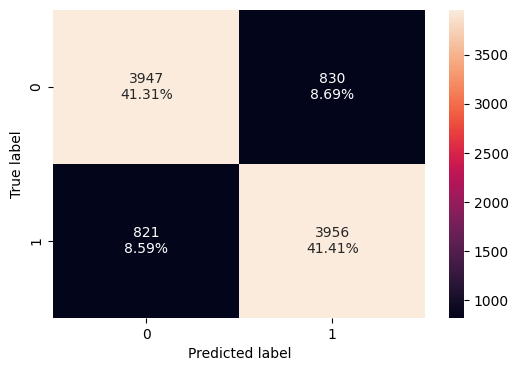

In [150]:
make_confusion_matrix(y_train_over, y_train_pred_5)

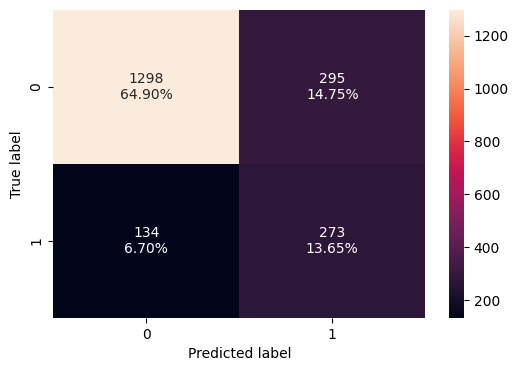

In [151]:
make_confusion_matrix(y_val, y_val_pred_5)

Observation

Confusion matrix displays that on the training set , the model has predicted 41.41% of True positives and 8.59 % of false negatives.


Confusion matrix displays that on the validation set , the model has predicted 13.65% of True positives and 6.70 % of false negatives.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [152]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [153]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [154]:
#Initializing the neural network
model_6_smote = Sequential()


model_6_smote .add(Dense(64, activation='relu', input_dim = X_train_over.shape[1]))
# Hidden layer with 32 neurons and activation as relu
model_6_smote .add(Dense(32, activation='relu'))
#Add drop out of 0.2 i.e 20% of neurons will be dropped
model_6_smote.add(Dropout(0.2))
# Hidden layer with 16 neurons and activation as relu
model_6_smote .add(Dense(16, activation='relu'))
#Add drop out of 0.1 i.e 10% of neurons will be dropped
model_6_smote.add(Dropout(0.1))

# Output layer with 1 neuron which gives the probablity of customer leaving or not leaving the bank services
model_6_smote .add(Dense(1, activation = 'sigmoid'))

In [155]:
#Using Adam as optimizer with a learning rate

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [156]:
# compiling the model
model_6_smote.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=metrics,run_eagerly=True)

In [157]:
model_6_smote.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Observation

From the above summary, we can see that this architecture will train a total of 3393 parameters i.e. weights and biases in the network.

In [158]:
#Training the model
#Here, for every epoch , there will be batches of 100 rows in each that will be processed.

start = time.time() #Logging time

history_6_smote = model_6_smote.fit(X_train_over, y_train_over, validation_data=(X_val,y_val) ,batch_size=batch_size, epochs=epochs)

end=time.time()

Epoch 1/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - loss: 0.6946 - recall: 0.3201 - val_loss: 0.6477 - val_recall: 0.2703
Epoch 2/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.6688 - recall: 0.4520 - val_loss: 0.6316 - val_recall: 0.5430
Epoch 3/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 0.6410 - recall: 0.6008 - val_loss: 0.6003 - val_recall: 0.6143
Epoch 4/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.6118 - recall: 0.6635 - val_loss: 0.5672 - val_recall: 0.6511
Epoch 5/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 0.5866 - recall: 0.6978 - val_loss: 0.5505 - val_recall: 0.6609
Epoch 6/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 0.5631 - recall: 0.7280 - val_loss: 0.5427 - val_recall: 0.6781
Epoch 7/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.5483 - recall: 0.7570 - val_loss: 0.5330 - val_recall: 0.6830
Epoch 8/80
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.5324 - recall: 0.7606 - val_loss: 0.5294 - val_recall: 0.6978
Epoch 9/80
96

In [159]:
print("Time taken in seconds ",end-start)

Time taken in seconds  747.6929352283478


Observation

For all 80 epochs, loss function or cost for both training(indicated as loss) and validation set(indicated as val_loss) is calculated. Recalls for training(recall) & validation set(val_recall) is calculated as well.

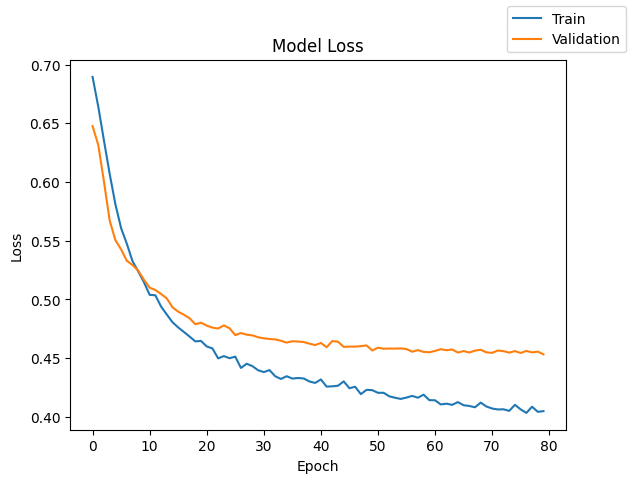

In [160]:
plot(history_6_smote,'loss')

The training and validation sets show a steady decrease in the loss function, which is a positive sign.


Around the 10th epoch, the training and validation loss converge, but fluctuations occur afterward.


The validation loss increases beyond this point, suggesting overfitting or a high learning rate.

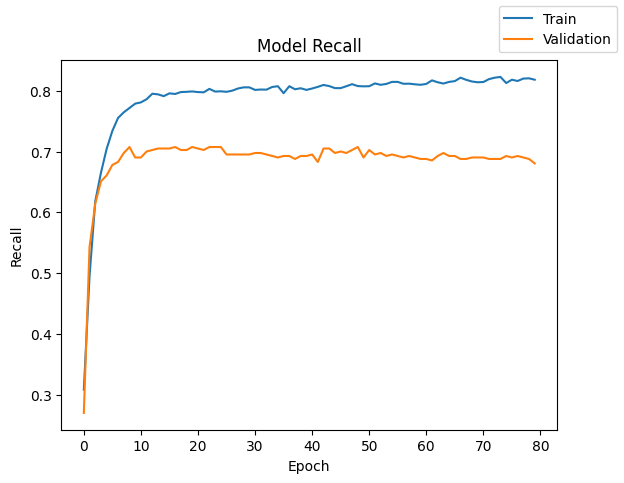

In [161]:
plot(history_6_smote,'recall')

Observation

Recall scores on both training and validation test is increasing but seems to be oscillating after about ~20th epoch .

Oscillations could also indicate signs of overfitting.This pattern is typical in scenarios where the model is gradually learning to identify more true positives, but variability in the training data or learning process causes fluctuations.

In [162]:
#Predicting the results using best as a threshold
y_train_pred_6 = model_6_smote.predict(X_train_over)
y_train_pred_6 = (y_train_pred_6 > 0.5)
y_train_pred_6

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [163]:
#Predicting the results using best as a threshold
y_val_pred_6 = model_6_smote.predict(X_val)
y_val_pred_6 = (y_val_pred_6 > 0.5)
y_val_pred_6

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [164]:
#Adding the recall scores to the data frame
model_name = "NN with Smote Adam Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_over, y_train_pred_6)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred_6)

In [165]:
train_metric_df

,recall
NN with SGD,0.546198
NN with ADAM,0.795585
NN with ADAM Dropout,0.789861
NN with Smote SGD,0.577768
NN with Smote Adam,0.828135
NN with Smote Adam Dropout,0.831903


In [166]:
valid_metric_df

,recall
NN with SGD,0.528256
NN with ADAM,0.727273
NN with ADAM Dropout,0.746929
NN with Smote SGD,0.484029
NN with Smote Adam,0.670762
NN with Smote Adam Dropout,0.680590


Observation

Recall scores on training set is about 0.83 and is about ~0.68 in validation set for the current model NN with Smote Adam Dropout.

But the recall scores are way off between training and validation set.

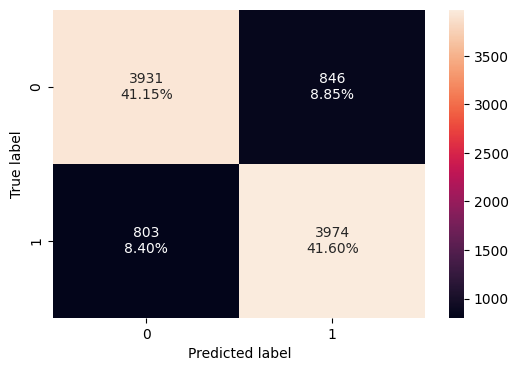

In [167]:
make_confusion_matrix(y_train_over, y_train_pred_6)

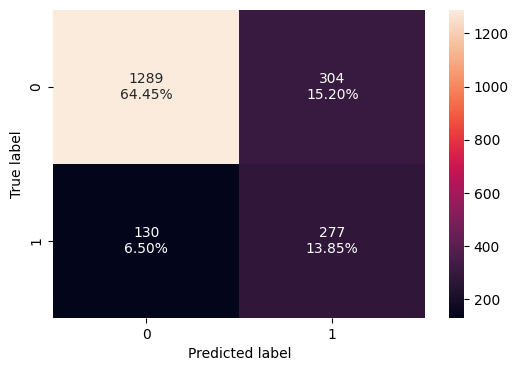

In [168]:
make_confusion_matrix(y_val, y_val_pred_6)

Observation

Confusion matrix displays that on the training set , the model has predicted 41% of True positives and 8.4 % of false negatives.


Confusion matrix displays that on the validation set , the model has predicted 13.85% of True positives and 6.5 % of false negatives.

## Model Performance Comparison and Final Model Selection

In [169]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.546198
NN with ADAM,0.795585
NN with ADAM Dropout,0.789861
NN with Smote SGD,0.577768
NN with Smote Adam,0.828135
NN with Smote Adam Dropout,0.831903


In [170]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.528256
NN with ADAM,0.727273
NN with ADAM Dropout,0.746929
NN with Smote SGD,0.484029
NN with Smote Adam,0.670762
NN with Smote Adam Dropout,0.680590


In [171]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.017942
NN with ADAM,0.068312
NN with ADAM Dropout,0.042932
NN with Smote SGD,0.093739
NN with Smote Adam,0.157373
NN with Smote Adam Dropout,0.151313


The NN model with SMOTE Adam and the NN model with SMOTE Adam Dropout perform well on the training data, achieving over ~82% accuracy.


However, the recall scores on the validation set for both models differ significantly from those on the training set, suggesting they may not generalize well to the test data.


The NN model with Adam Dropout shows consistent recall scores across training and validation data, around over 74%, which is a strong performance.This model does not exhibit signs of underfitting or overfitting.


Among the trained models, the **Neural Network with Adam optimizer and Dropout** appears to perform the best overall.

In [172]:
#Let's use the trained model to predict results on test data.
y_test_pred = model_3_orig.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [173]:
#Recall score on test data
recall_score(y_test,y_test_pred)

0.7714987714987716

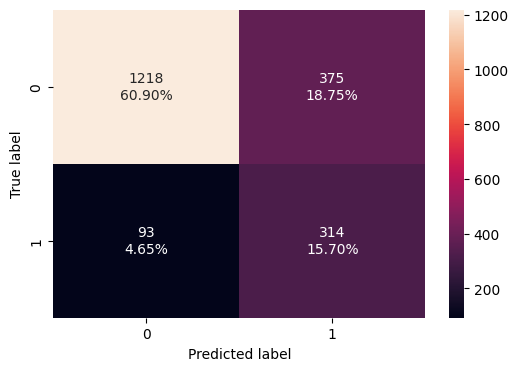

In [174]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

Observation

Recall score on the test data is around 77% which is in line with recall scores observed on training and validation data.

Model seems to be predicting 15.7% of True positives and 4.6% False negatives which is quite good as well.

## Actionable Insights and Business Recommendations

*
Findings from Exploratory Data Analysis


Customers with low credit scores are more likely to leave the bank.
Older customers tend to exit the bank at a higher rate compared to younger customers.


Female customers have a higher exit rate compared to male customers.
Inactive customers who do not frequently use bank services are more likely to leave.


Most customers who have left the bank are from Germany, followed by France.


**Business Recommendations:**


The bank could introduce cashback incentives, additional credit lines, or rewards programs for customers who frequently use credit services to encourage retention.


To retain older customers, the bank may consider tailored incentives or cashback offers.


Customers with low credit scores or income could be provided with credit card options featuring lower limits or reduced interest rates to assist with repayment.


The bank could implement targeted benefits or special offers for female customers to improve retention.


Customers who own Product 4 tend to leave the bank—gathering feedback and improving these products may help retain them.


Inactive customers who have minimal engagement with the bank could be encouraged through personalized offers or new services.


Since customers in Spain tend to stay with the bank, banks in Germany and France could study and adopt successful retention strategies from Spain.


<font size=6 color='blue'>Power Ahead</font>
___